In [1]:
import numpy as np
import matplotlib.pyplot as plt
from result_utils import *
import scipy.io
import os
import glob
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"


In [2]:
data_path = r"path/to/data"

In [3]:
data_lists_path = os.path.join(data_path, 'train_list.csv')

with open(data_lists_path) as f:
    data_list = sorted(f.read().split('\n')[:-1])
    
data_list

['indoor/bird1_b.mat',
 'indoor/bird1_f.mat',
 'indoor/bird1_l.mat',
 'indoor/bird1_r.mat',
 'indoor/bird2_b.mat',
 'indoor/bird2_f.mat',
 'indoor/bird2_l.mat',
 'indoor/bird2_r.mat',
 'indoor/christmas_deer_b.mat',
 'indoor/christmas_deer_f.mat',
 'indoor/christmas_deer_l.mat',
 'indoor/christmas_deer_r.mat',
 'indoor/cow_l.mat',
 'indoor/cow_r.mat',
 'indoor/elephant1_r.mat',
 'indoor/elephant2_l.mat',
 'indoor/monk1_b.mat',
 'indoor/monk1_f.mat',
 'indoor/monk1_l.mat',
 'indoor/monk1_r.mat',
 'indoor/monk3_b.mat',
 'indoor/monk3_f.mat',
 'indoor/monk3_l.mat',
 'indoor/monk3_r.mat',
 'indoor/monk4_b.mat',
 'indoor/monk4_f.mat',
 'indoor/monk4_l.mat',
 'indoor/monk4_r.mat',
 'indoor/monk5_b.mat',
 'indoor/monk5_f.mat',
 'indoor/monk5_l.mat',
 'indoor/monk5_r.mat',
 'indoor/monk6_b.mat',
 'indoor/monk6_f.mat',
 'indoor/monk6_l.mat',
 'indoor/monk6_r.mat',
 'indoor/monk7_b.mat',
 'indoor/monk7_f.mat',
 'indoor/monk7_l.mat',
 'indoor/monk7_r.mat',
 'indoor/monk8_b.mat',
 'indoor/monk8_f.

In [39]:
tests = [crop_to_bbox(scipy.io.loadmat(os.path.join(data_path, *pth.split('/')))) for pth in data_list]


In [302]:
def create_mosaic(i,):
    return [[7*i, 7*i],
              [7*i, 7*i],
              [7*i+1, 7*i+2],
              [7*i+3, 7*i+4],
              [7*i+5, 7*i+5],
              [7*i+5, 7*i+5],
              [7*i+6, 7*i+6],
              [7*i+6, 7*i+6]]
    

a = np.concatenate([create_mosaic(ه) for ه in range(6)], axis=1)
          

In [303]:
nn=0

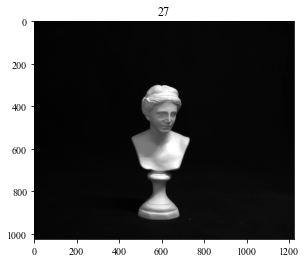

In [300]:
obj = tests[24]
images = obj['images']
plt.imshow(images[..., 0], 'gray')
plt.title(str(nn))
nn += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


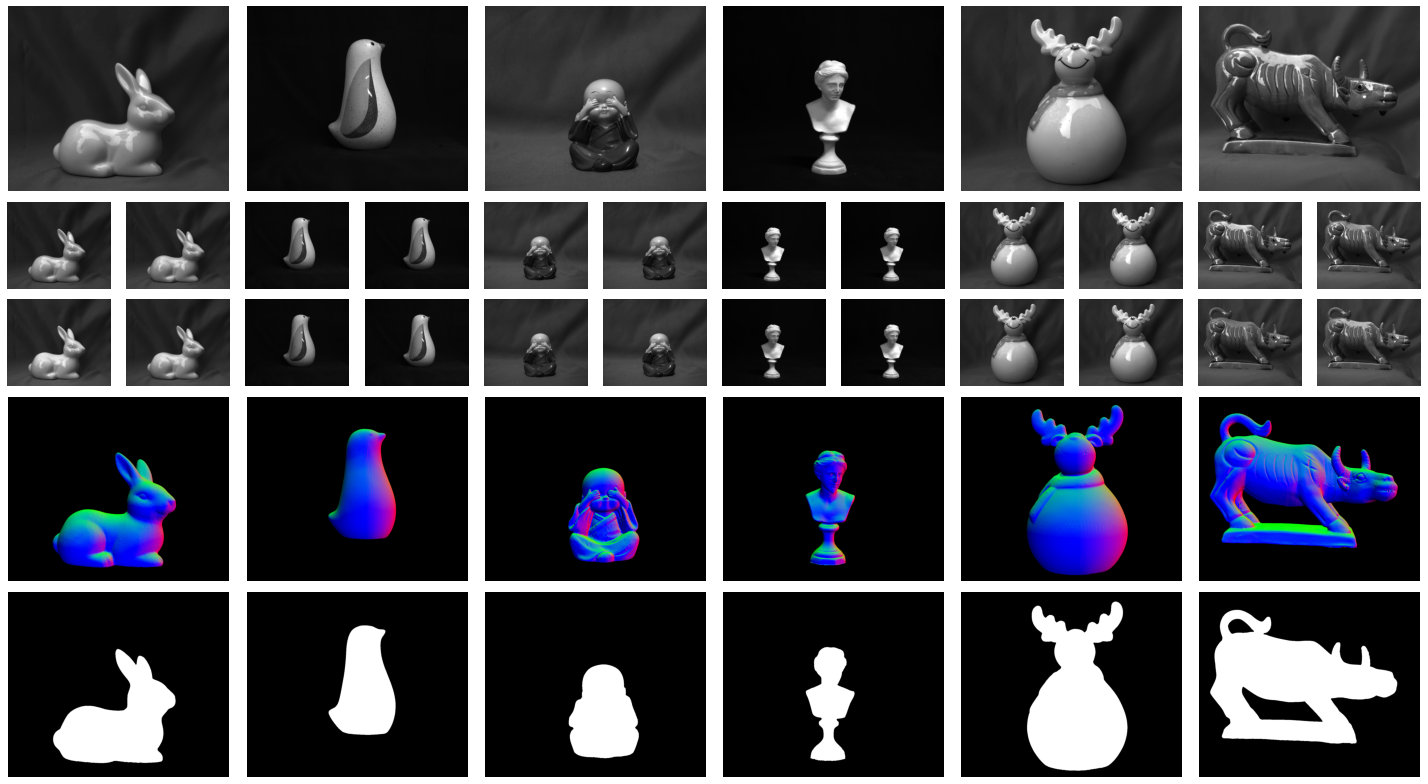

In [310]:
fix, axes = plt.subplot_mosaic(a, figsize=(20,11))
tests_r = np.array(tests)[[1, 4, 13, 24, 93, 38]]

for i in range(7*5+7):
    axes[i].axis('off')

for i in range(6):
    obj = tests_r[i]
    mask = obj['mask']
    gt = obj['Normals_gt']
    images = obj['images']
    axes[7*i].imshow(images[..., 0], 'gray')
    for j in range(1,5):
        axes[7*i+j].imshow(images[..., j-1], 'gray')
    axes[7*i+5].imshow(gt, 'gray')
    axes[7*i+6].imshow(mask, 'gray')

fix.tight_layout()
plt.savefig('fig_data.png', facecolor='white', transparent=False)

    